In [2]:
import os 
os.environ['KAGGLE_USERNAME'] = 'comsci125teerapong'
os.environ['KAGGLE_KEY'] = 'c4095229aa2a02465c0b05b9152063c6'

!pip install kaggle
!kaggle competitions download -c jpx-tokyo-stock-exchange-prediction

 97% 217M/224M [00:02<00:00, 108MB/s] 
100% 224M/224M [00:02<00:00, 97.4MB/s]


In [3]:
!unzip /content/jpx-tokyo-stock-exchange-prediction.zip

Archive:  /content/jpx-tokyo-stock-exchange-prediction.zip
  inflating: data_specifications/options_spec.csv  
  inflating: data_specifications/stock_fin_spec.csv  
  inflating: data_specifications/stock_list_spec.csv  
  inflating: data_specifications/stock_price_spec.csv  
  inflating: data_specifications/trades_spec.csv  
  inflating: example_test_files/financials.csv  
  inflating: example_test_files/options.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/secondary_stock_prices.csv  
  inflating: example_test_files/stock_prices.csv  
  inflating: example_test_files/trades.csv  
  inflating: jpx_tokyo_market_prediction/__init__.py  
  inflating: jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: stock_list.csv          
  inflating: supplemental_files/financials.csv  
  inflating: supplemental_files/options.csv  
  inflating: supplemental_files/secondary_stock_prices.csv  
  inflating: supplemental_fil

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [4]:
sample = pd.read_csv("/content/example_test_files/sample_submission.csv")
sample

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,0
1,2021-12-06,1332,1
2,2021-12-06,1333,2
3,2021-12-06,1375,3
4,2021-12-06,1376,4
...,...,...,...
111995,2022-02-28,9990,1995
111996,2022-02-28,9991,1996
111997,2022-02-28,9993,1997
111998,2022-02-28,9994,1998


In [5]:
sample.nunique()

Date                56
SecuritiesCode    2000
Rank              2000
dtype: int64

In [6]:
stock_prices = pd.read_csv("/content/train_files/stock_prices.csv")
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [7]:
stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])


In [8]:
tmpdf = stock_prices[stock_prices["SecuritiesCode"]==1301].reset_index(drop=True)
tmpdf.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092


In [9]:
tmpdf["Close_shift1"] = tmpdf["Close"].shift(-1)
tmpdf["Close_shift2"] = tmpdf["Close"].shift(-2)

tmpdf["rate"] = (tmpdf["Close_shift2"] - tmpdf["Close_shift1"]) / tmpdf["Close_shift1"]
tmpdf

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Close_shift1,Close_shift2,rate
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2738.0,2740.0,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,2740.0,2748.0,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,2748.0,2745.0,-0.001092
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,2745.0,2731.0,-0.005100
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,2731.0,2722.0,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,20211129_1301,2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793,2900.0,2911.0,0.003793
1198,20211130_1301,2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558,2911.0,2933.0,0.007558
1199,20211201_1301,2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706,2933.0,2982.0,0.016706
1200,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689,2982.0,NaN,NaN


In [12]:
tmpdf2 = stock_prices[stock_prices["Date"]=="2021-12-02"].reset_index(drop=True)
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689
1,20211202_1332,2021-12-02,1332,566.0,577.0,565.0,573.0,1525800,1.0,NaN,False,0.006838
2,20211202_1333,2021-12-02,1333,2276.0,2314.0,2267.0,2303.0,157000,1.0,NaN,False,0.008058
3,20211202_1375,2021-12-02,1375,1220.0,1244.0,1209.0,1212.0,121600,1.0,NaN,False,-0.008907
4,20211202_1376,2021-12-02,1376,1353.0,1373.0,1327.0,1327.0,7800,1.0,NaN,False,0.014264
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211202_9990,2021-12-02,9990,518.0,519.0,507.0,507.0,109500,1.0,NaN,False,-0.020833
1996,20211202_9991,2021-12-02,9991,777.0,791.0,775.0,778.0,46600,1.0,NaN,False,-0.011335
1997,20211202_9993,2021-12-02,9993,1672.0,1685.0,1650.0,1650.0,6900,1.0,NaN,False,-0.010942
1998,20211202_9994,2021-12-02,9994,2340.0,2382.0,2340.0,2362.0,9200,1.0,NaN,False,0.012139


In [13]:
tmpdf2["rank"] = tmpdf2["Target"].rank(ascending=False,method="first") -1 
tmpdf2 = tmpdf2.sort_values("rank").reset_index(drop=True)

In [14]:
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211202_4483,2021-12-02,4483,8200.0,8590.0,8180.0,8410.0,320300,1.0,NaN,False,-0.085480,1995.0
1996,20211202_6879,2021-12-02,6879,731.0,745.0,702.0,707.0,735500,1.0,NaN,False,-0.087248,1996.0
1997,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0
1998,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0


In [15]:
tmpdf2_top200 = tmpdf2.iloc[:200,:]
tmpdf2_top200

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211202_6272,2021-12-02,6272,1291.0,1343.0,1291.0,1308.0,23900,1.0,NaN,False,0.012734,195.0
196,20211202_6324,2021-12-02,6324,4500.0,4635.0,4400.0,4490.0,417100,1.0,NaN,False,0.012698,196.0
197,20211202_2899,2021-12-02,2899,1899.0,1919.0,1880.0,1906.0,39400,1.0,NaN,False,0.012697,197.0
198,20211202_2185,2021-12-02,2185,1376.0,1376.0,1355.0,1355.0,200,1.0,NaN,False,0.012687,198.0


In [16]:
weight = np.linspace(start=2, stop=1, num = 200)
weight

array([2.        , 1.99497487, 1.98994975, 1.98492462, 1.9798995 ,
       1.97487437, 1.96984925, 1.96482412, 1.95979899, 1.95477387,
       1.94974874, 1.94472362, 1.93969849, 1.93467337, 1.92964824,
       1.92462312, 1.91959799, 1.91457286, 1.90954774, 1.90452261,
       1.89949749, 1.89447236, 1.88944724, 1.88442211, 1.87939698,
       1.87437186, 1.86934673, 1.86432161, 1.85929648, 1.85427136,
       1.84924623, 1.84422111, 1.83919598, 1.83417085, 1.82914573,
       1.8241206 , 1.81909548, 1.81407035, 1.80904523, 1.8040201 ,
       1.79899497, 1.79396985, 1.78894472, 1.7839196 , 1.77889447,
       1.77386935, 1.76884422, 1.7638191 , 1.75879397, 1.75376884,
       1.74874372, 1.74371859, 1.73869347, 1.73366834, 1.72864322,
       1.72361809, 1.71859296, 1.71356784, 1.70854271, 1.70351759,
       1.69849246, 1.69346734, 1.68844221, 1.68341709, 1.67839196,
       1.67336683, 1.66834171, 1.66331658, 1.65829146, 1.65326633,
       1.64824121, 1.64321608, 1.63819095, 1.63316583, 1.62814

In [17]:
tmpdf2_top200['weight'] = weight
tmpdf2_top200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weight
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0,2.000000
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0,1.994975
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0,1.989950
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0,1.984925
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0,1.979899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211202_6272,2021-12-02,6272,1291.0,1343.0,1291.0,1308.0,23900,1.0,NaN,False,0.012734,195.0,1.020101
196,20211202_6324,2021-12-02,6324,4500.0,4635.0,4400.0,4490.0,417100,1.0,NaN,False,0.012698,196.0,1.015075
197,20211202_2899,2021-12-02,2899,1899.0,1919.0,1880.0,1906.0,39400,1.0,NaN,False,0.012697,197.0,1.010050
198,20211202_2185,2021-12-02,2185,1376.0,1376.0,1355.0,1355.0,200,1.0,NaN,False,0.012687,198.0,1.005025


In [18]:
tmpdf2_top200['cal_weight'] = tmpdf2_top200['Target'] * tmpdf2_top200['weight']
tmpdf2_top200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weight,cal_weight
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0,2.000000,0.462963
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0,1.994975,0.297757
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0,1.989950,0.244983
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0,1.984925,0.212409
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0,1.979899,0.204153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211202_6272,2021-12-02,6272,1291.0,1343.0,1291.0,1308.0,23900,1.0,NaN,False,0.012734,195.0,1.020101,0.012990
196,20211202_6324,2021-12-02,6324,4500.0,4635.0,4400.0,4490.0,417100,1.0,NaN,False,0.012698,196.0,1.015075,0.012890
197,20211202_2899,2021-12-02,2899,1899.0,1919.0,1880.0,1906.0,39400,1.0,NaN,False,0.012697,197.0,1.010050,0.012824
198,20211202_2185,2021-12-02,2185,1376.0,1376.0,1355.0,1355.0,200,1.0,NaN,False,0.012687,198.0,1.005025,0.012750


In [19]:
sup = tmpdf2_top200['cal_weight'].sum() / np.mean(weight)
sup

5.806640386677844

In [20]:
bottom200 = tmpdf2.iloc[-200:, :]
bottom200 = bottom200.sort_values('rank',ascending=False).reset_index(drop=True)
bottom200

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,False,-0.127424,1999.0
1,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0
2,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0
3,20211202_6879,2021-12-02,6879,731.0,745.0,702.0,707.0,735500,1.0,NaN,False,-0.087248,1996.0
4,20211202_4483,2021-12-02,4483,8200.0,8590.0,8180.0,8410.0,320300,1.0,NaN,False,-0.085480,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211202_4482,2021-12-02,4482,940.0,972.0,915.0,920.0,111600,1.0,NaN,False,-0.026205,1804.0
196,20211202_7990,2021-12-02,7990,3375.0,3390.0,3290.0,3335.0,114200,1.0,NaN,False,-0.026163,1803.0
197,20211202_6920,2021-12-02,6920,29950.0,30360.0,29540.0,30010.0,4529200,1.0,NaN,False,-0.026036,1802.0
198,20211202_4620,2021-12-02,4620,502.0,511.0,501.0,501.0,53000,1.0,NaN,False,-0.025896,1801.0


In [21]:
bottom200['weight'] = weight 
bottom200.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weight
0,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,False,-0.127424,1999.0,2.000000
1,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0,1.994975
2,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0,1.989950


In [ ]:
#############################################################################################################################################################

<h1>Portfolio-Efficient-Frontier

In [23]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 31.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [25]:
#specifying the assets
tickers = ['XLE','XLI']

#specifying the start and end dates
start = "2017-11-27"
end = "2018-11-27"

#downloading price data for the assets
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = yf.download(ticker, start, end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
data.head()

,XLE,XLI
Date,,
2017-11-27,67.190002,71.529999
2017-11-28,67.709999,72.620003
2017-11-29,68.080002,73.260002
2017-11-30,69.099998,74.510002
2017-12-01,69.680000,73.589996


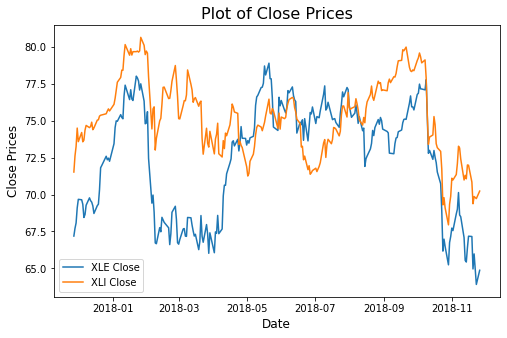

In [27]:
plt.figure(figsize=(8,5))

plt.plot(data.index, data['XLE'], label='XLE Close')
plt.plot(data.index, data['XLI'], label='XLI Close')
plt.title('Plot of Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.legend()
plt.show()

In [28]:
returns = pd.DataFrame()

#calculate daily log returns
for ticker in tickers:
    returns[ticker] = np.log(data[ticker]/data[ticker].shift(1))

#drop rows with NaN
returns = returns.dropna()

In [29]:
returns.head()

,XLE,XLI
Date,,
2017-11-28,0.007709,0.015123
2017-11-29,0.005450,0.008774
2017-11-30,0.014871,0.016919
2017-12-01,0.008359,-0.012424
2017-12-04,-0.000431,0.008390


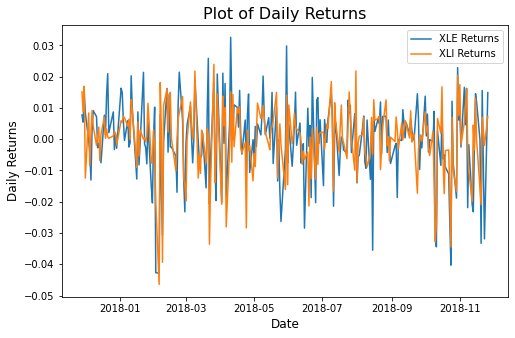

In [30]:
plt.figure(figsize=(8,5))

plt.plot(returns.index, returns['XLE'], label='XLE Returns')
plt.plot(returns.index, returns['XLI'], label='XLI Returns')
plt.title('Plot of Daily Returns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns', fontsize=12)
plt.legend()
plt.show()

In [31]:
daily_std = returns.std()
daily_std

XLE    0.012810
XLI    0.010772
dtype: float64

In [32]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

XLE    0.203353
XLI    0.171007
dtype: float64

In [33]:
ret_corr = returns[['XLE', 'XLI']].corr()
ret_corr

,XLE,XLI
XLE,1.000000,0.660426
XLI,0.660426,1.000000


In [34]:
corr_value = np.round(ret_corr['XLE'][1],3)
print('The Correlation between the two assets is:', corr_value)

The Correlation between the two assets is: 0.66


In [36]:
w1=np.linspace(0,1,11)
w2=np.linspace(1,0,11)

In [38]:
weights_df = pd.DataFrame()

weights_df['XLE Weight'] = w1
weights_df['XLI Weight'] = w2

weights_df

,XLE Weight,XLI Weight
0,0.0,1.0
1,0.1,0.9
2,0.2,0.8
3,0.3,0.7
4,0.4,0.6
5,0.5,0.5
6,0.6,0.4
7,0.7,0.3
8,0.8,0.2
9,0.9,0.1


In [39]:
annualized_std

XLE    0.203353
XLI    0.171007
dtype: float64

In [40]:
xle_vol = annualized_std[0]
xli_vol = annualized_std[1]

In [41]:
xle_vol, xli_vol

(0.20335309806894042, 0.1710067876397469)

In [42]:
cor=corr_value
cor

0.66

<h1>Expected Returns using Capital Asset Pricing Model (CAPM)

In [43]:
beta_xle = 1.07 #Beta Value of XLE
beta_xli = 1.06 #Beta Value of XLI
risk_free_rate = 0.0225 # Risk Free Rate
market_return = 0.09 #Market Return
market_std = 0.15 #Market Standard Deviation


In [44]:
ret_xle = risk_free_rate + beta_xle * (market_return - risk_free_rate)

# Expected Return of XLI
ret_xli = risk_free_rate + beta_xli * (market_return - risk_free_rate)

# Expected Return of S&P 500
ret_sp500 = risk_free_rate + 1 * (market_return - risk_free_rate) #Market beta is 1

In [45]:
xle_ret=ret_xle
xli_ret=ret_xli

xle_ret, xli_ret

(0.094725, 0.09405)

In [46]:
#Compure Returns and Volatility for each combination

portfolio = weights_df.copy()

#portfolio Returns
portfolio['Portfolio Returns'] = ((portfolio['XLE Weight']*xle_ret) + (portfolio['XLI Weight']*xli_ret))

#portfolio volatility
portfolio['Volatility'] = np.sqrt(((portfolio['XLE Weight'])**2 * xle_vol**2) + 
                              ((portfolio['XLI Weight'])**2 * xli_vol**2) +
                              (2 * (portfolio['XLE Weight']) * xle_vol *
                              (portfolio['XLI Weight']) * xli_vol) * cor)

In [47]:
portfolio

,XLE Weight,XLI Weight,Portfolio Returns,Volatility
0,0.0,1.0,0.094050,0.171007
1,0.1,0.9,0.094117,0.168023
2,0.2,0.8,0.094185,0.166476
3,0.3,0.7,0.094252,0.166405
4,0.4,0.6,0.094320,0.167811
5,0.5,0.5,0.094387,0.170659
6,0.6,0.4,0.094455,0.174878
7,0.7,0.3,0.094522,0.180372
8,0.8,0.2,0.094590,0.187029
9,0.9,0.1,0.094658,0.194728


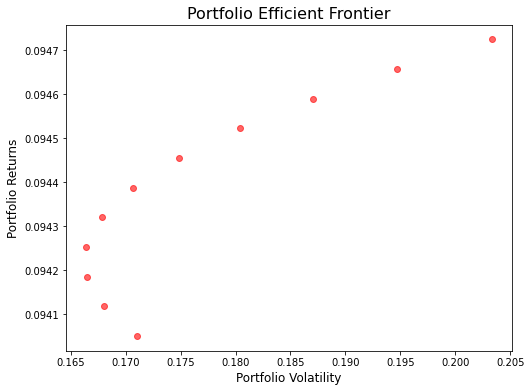

In [48]:
plt.figure(figsize= (8,6))

plt.title('Portfolio Efficient Frontier', fontsize=16)
plt.scatter(portfolio['Volatility'], 
            portfolio['Portfolio Returns'],color='r', alpha=0.6)

plt.xlabel('Portfolio Volatility', fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=12)

plt.show()

In [49]:
Vol_threshold = 0.168
return_threshold = 0.0943
n = len(portfolio)

# Data ponts
points = []
for i, j in zip(portfolio['Volatility'], portfolio['Portfolio Returns']):
    points.append((i,j))                       

# Portfolio Weights, (xle, xli)
w = []
for i, j in zip(portfolio['XLE Weight'], portfolio['XLI Weight']):
    w.append((np.round(i,1), np.round(j,1)))

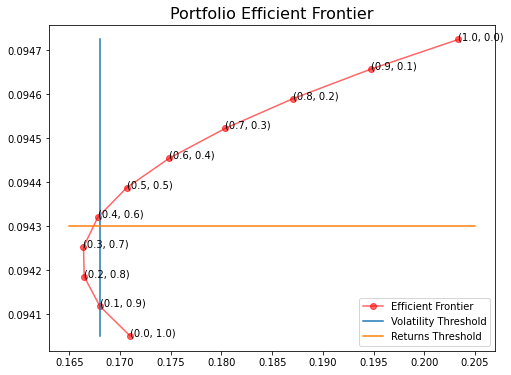

In [50]:
plt.figure(figsize= (8,6))

plt.title('Portfolio Efficient Frontier', fontsize=16)

plt.plot(portfolio['Volatility'], portfolio['Portfolio Returns'],'-or', 
         alpha=0.6, label='Efficient Frontier')

plt.plot(n * [Vol_threshold], portfolio['Portfolio Returns'],
        label = 'Volatility Threshold')

plt.plot(np.linspace(0.165,0.205,11), n * [return_threshold],
        label = 'Returns Threshold')

for i, j in zip(points, w):
    plt.text(i[0],i[1],j)

plt.legend()
plt.show()